# Final project

## Goals

Write an agglomerative clustering algorithm for Reddit data. 

## Packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data= pd.read_csv('medoutput.csv')
subset_data= pd.read_csv('subset_medoutput.csv')

freqs=data.loc[:,list(set(data.columns) - set(('subreddit','count(1)','sum(wordcount)')))]
subset_freqs=subset_data.loc[:,list(set(data.columns) - set(('subreddit','count(1)','sum(wordcount)')))]


In [2]:
def normalize(vector):
    v2=vector
    vmin=float(min(vector))
    vmax=float(max(vector))
    vrange=vmax-vmin

#    print('vector', vector, vrange)
    
    l=len(vector)
    for i in range(0,l):
        dif=float(vector[i])-vmin
#        print('dif',dif, vrange, dif/vrange)
        v2[i]=dif/vrange
#        print(vector[i])
    return v2

def normalizeall(df):
    df2=df
    i=df.shape[1]
    for j in range(0,i):
        df2[:,j]=normalize(df2[:,j])
    return df2

nfreqs=normalizeall(np.array(freqs))
nsubset_freqs=normalizeall(np.array(subset_freqs))


## Agglomerative Clustering

In [3]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', memory='cacheing/', 
                        connectivity=None, 
                        compute_full_tree='auto', 
                        linkage='average')

In [4]:
# empty for running one liners


In [5]:
model.fit(freqs)
#plt.figure()
#plt.axes([0, 0, 1, 1])
#for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
#    plt.plot(freqs[model.labels_ == l].T, c=c, alpha=.5)
#plt.axis('tight')
#plt.axis('off')
#plt.suptitle("AgglomerativeClustering(affinity=%s)" % 'euclidean', size=20)


#plt.show()

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory='cacheing/',
            n_clusters=5, pooling_func=<function mean at 0x7fe7ac23d598>)

## PCA

0.905653876965937

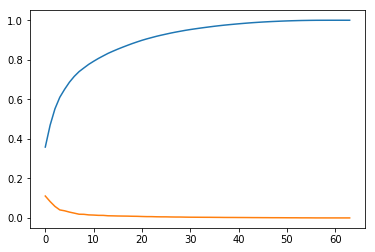

In [13]:
exp_var_rat=np.zeros(66)
change=np.zeros(66)

for componentsN in range(65,0,-1):
    pca=PCA(n_components=componentsN)
    pca.fit(nfreqs)
#    print("components",componentsN)
#    print("explained variance", pca.explained_variance_ratio_)
#    print(" sum explained variance", sum(pca.explained_variance_ratio_))
    exp_var_rat[componentsN-1]=sum(pca.explained_variance_ratio_)
    change[componentsN-1]=exp_var_rat[componentsN]-exp_var_rat[componentsN-1]
#print(exp_var_rat)
#print(change)


plt.plot(exp_var_rat[:64])
plt.plot(change[:64])
                
exp_var_rat[21]

In [12]:
hyperC=21
dimlabellist=['d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14','d15','d16','d17','d18','d19','d20','d21']
pca=PCA(n_components=hyperC)
nred_data=pca.fit_transform(nfreqs)
numnfreqs=np.array(nfreqs)

'''#10*65 version
cov=np.zeros((10,65))
for od in range (0,65):
    #print(od, nfreqs[:,od])
    for pc in range (0,10):
        #print(pc,red_data[:,pc])
        cov[pc,od]=np.correlate(nfreqs[:,od],red_data[:,pc])
cov=pd.DataFrame(cov,columns=list(freqs))
print(cov)
'''

#65*10 version

cov=np.zeros((65,hyperC))

for od in range (0,65):
    #print(od, nfreqs[:,od])
    for pc in range (0,hyperC):
        #print(pc,red_data[:,pc])
        cov[od,pc]=np.correlate(numnfreqs[:,od],nred_data[:,pc])
        
cov=pd.DataFrame(cov,index=list(freqs),columns=dimlabellist)

abscov=abs(cov)

#abscov.sort_values(by=['d11'],ascending=False)

#for column in abscov.columns:
#    print(column)
#    print(abscov.sort_values(by=column,ascending=False).head(3).index)

In [8]:
data.shape

(1224, 68)

In [10]:
hyperC=21

pca=PCA(n_components=hyperC)
nred_subdata=pca.fit_transform(nsubset_freqs)
nsfreqs=np.array(nsubset_freqs)


pd.DataFrame(nsubset_freqs, columns=list(freqs), index=)
.to_csv('normal_subset_freqs.csv')
pd.DataFrame(nred_subdata,columns=dimlabellist).to_csv('reduced_normal_subset_freqs')


'''#10*65 version
cov=np.zeros((10,65))
for od in range (0,65):
    #print(od, nfreqs[:,od])
    for pc in range (0,10):
        #print(pc,red_data[:,pc])
        cov[pc,od]=np.correlate(nfreqs[:,od],red_data[:,pc])
cov=pd.DataFrame(cov,columns=list(freqs))
print(cov)
'''

#65*10 version

cov=np.zeros((65,hyperC))

for od in range (0,65):
    #print(od, nfreqs[:,od])
    for pc in range (0,hyperC):
        #print(pc,red_data[:,pc])
        cov[od,pc]=np.correlate(nsfreqs[:,od],nred_subdata[:,pc])
cov=pd.DataFrame(cov,index=list(subset_freqs),columns=dimlabellist,)

abscov=abs(cov)

abscov.to_csv('subset_covariance.csv')

#for column in abscov.columns:
#    print(column)
#    print(abscov.sort_values(by=column,ascending=False).head(15).index)


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [24]:

abscov.sort_values(by='d1') 


,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21
fillerfreq,0.003339,0.000660,0.000938,0.000508,0.000344,0.000558,0.001202,0.001214,0.000607,0.000133,...,0.000992,0.000206,0.000417,0.000065,0.000234,0.000329,0.000098,0.000288,0.000299,0.000471
religfreq,0.020942,0.159218,0.149261,0.038306,0.053887,0.108823,0.098599,0.009566,0.059316,0.078005,...,0.034677,0.083979,0.044166,0.091138,0.061018,0.041944,0.110025,0.011274,0.034493,0.050535
nonflfreq,0.043689,0.013101,0.012582,0.007933,0.015192,0.016110,0.000760,0.003750,0.002429,0.013393,...,0.018362,0.012613,0.004430,0.001326,0.000537,0.010567,0.012660,0.003084,0.003712,0.003407
inhibfreq,0.098254,0.039333,0.122541,0.013019,0.048155,0.052936,0.060115,0.062693,0.005618,0.020612,...,0.042376,0.005855,0.002882,0.002182,0.014829,0.016563,0.008385,0.003808,0.022227,0.011708
seefreq,0.160688,0.086109,0.127909,0.027646,0.068129,0.166435,0.235665,0.027363,0.047431,0.072959,...,0.069099,0.012909,0.007391,0.037878,0.050904,0.018003,0.019169,0.005312,0.021929,0.031875
assentfreq,0.189784,0.157300,0.090284,0.025738,0.109080,0.032323,0.012323,0.020203,0.035672,0.016006,...,0.031572,0.003065,0.051034,0.007262,0.012386,0.003795,0.007201,0.032500,0.000039,0.005729
deathfreq,0.207431,0.137553,0.241499,0.112663,0.045512,0.034812,0.000150,0.001455,0.033486,0.001400,...,0.009996,0.040438,0.019622,0.010648,0.054986,0.010914,0.012240,0.016514,0.009787,0.032610
achievefreq,0.234936,0.658495,0.605025,0.127621,0.075745,0.229860,0.267531,0.078862,0.089633,0.061934,...,0.117254,0.098052,0.111555,0.037343,0.109455,0.086345,0.015911,0.008274,0.002150,0.037097
numberfreq,0.237080,0.005280,0.077064,0.023372,0.151314,0.083081,0.019457,0.040834,0.005456,0.016662,...,0.014342,0.022645,0.013298,0.000210,0.015904,0.011078,0.011636,0.004140,0.032711,0.010198
swearfreq,0.239969,0.200276,0.032108,0.028987,0.043994,0.043297,0.053193,0.063019,0.075799,0.021734,...,0.041842,0.020772,0.040302,0.001903,0.015112,0.018579,0.004560,0.025244,0.001686,0.000369


## Kmeans on PCA
### larger daatset

In [ ]:
hyper=25

cluster_score=np.zeros(hyper)
change=np.zeros(hyper)

for clustersN in range(hyper,0,-1):
    kmeans=KMeans(n_clusters=clustersN)
    kmeans.fit(nred_data)
    cluster_score[clustersN-1]=kmeans.score(nred_data)
    change[clustersN-2]=cluster_score[clustersN-1]-cluster_score[clustersN-2]

print(cluster_score)

print(change)
plt.plot(cluster_score)
plt.plot(change[:-1])

In [ ]:
hyperC=7
kmeans=KMeans(n_clusters=hyperC)

predictions=kmeans.fit_predict(nred_data)

kmeans.score(nred_data)
print(kmeans.cluster_centers_)



data['cluster']=predictions

clabels= []

for c in range(0,hyperC):
    #print(c,'\n') 
    #print(kmeans.cluster_centers_[c])
    clabels.append(str(list(data[data['cluster']==c].sort_values(by='count(1)').tail(10)['subreddit'])))

print(clabels)

In [ ]:
centers=pd.DataFrame(kmeans.cluster_centers_,index=clabels, columns=dimlabellist)
centers.to_csv('centers.csv')

### smaller data

In [ ]:
hyperC=15
kmeans=KMeans(n_clusters=hyperC)

spredictions=kmeans.fit_predict(nred_subdata)

kmeans.score(nred_subdata)
print(kmeans.cluster_centers_)



subset_data['cluster']=spredictions

clabels= []

for c in range(0,hyperC):
    #print(c,'\n') 
    #print(kmeans.cluster_centers_[c])
    clabels.append(str(list(subset_data[subset_data['cluster']==c].sort_values(by='count(1)').tail(10)['subreddit'])))

print(clabels)

In [ ]:
centers=pd.DataFrame(kmeans.cluster_centers_,index=clabels, columns=dimlabellist)
centers.to_csv('subsetcenters.csv')